With a simple python code to demonstrate the following using this simple dataset: This is a 2x3 between-subjects design with 2 levels of therapy (new vs. old) and 3 levels duration (short- vs. medium- vs. long-term improvement). The dependent variable is an improvement index where the higher the score, the greater the improvement.

## Creat the dataset

In [4]:
import pandas as pd

data = {
    'Therapy': ['New', 'New', 'New', 'New', 'Old', 'Old', 'Old', 'Old',
                'New', 'New', 'New', 'New', 'Old', 'Old', 'Old', 'Old',
                'New', 'New', 'New', 'New', 'Old', 'Old', 'Old', 'Old'],
    'Duration': ['Short-term', 'Short-term', 'Short-term', 'Short-term',
                 'Short-term', 'Short-term', 'Short-term', 'Short-term',
                 'Medium-term', 'Medium-term', 'Medium-term', 'Medium-term',
                 'Medium-term', 'Medium-term', 'Medium-term', 'Medium-term',
                 'Long-term', 'Long-term', 'Long-term', 'Long-term',
                 'Long-term', 'Long-term', 'Long-term', 'Long-term'],
    'Improvement': [6, 9, 8, 5, 10, 11, 5, 9,
                    15, 18, 16, 20, 9, 12, 13, 9,
                    10, 12, 9, 13, 8, 7, 9, 12]
}

# Create the DataFrame
df = pd.DataFrame(data)

df

,Therapy,Duration,Improvement
0,New,Short-term,6
1,New,Short-term,9
2,New,Short-term,8
3,New,Short-term,5
4,Old,Short-term,10
5,Old,Short-term,11
6,Old,Short-term,5
7,Old,Short-term,9
8,New,Medium-term,15
9,New,Medium-term,18


## Task 1

Generate a table of means and SDs.

In [5]:
# Calculate means and standard deviations for each combination of Therapy and Duration
means_sds = df.groupby(['Therapy', 'Duration']).agg(['mean', 'std']).reset_index()
means_sds.columns = ['Therapy', 'Duration', 'Mean Improvement', 'SD Improvement']

means_sds

,Therapy,Duration,Mean Improvement,SD Improvement
0,New,Long-term,11.00,1.825742
1,New,Medium-term,17.25,2.217356
2,New,Short-term,7.00,1.825742
3,Old,Long-term,9.00,2.160247
4,Old,Medium-term,10.75,2.061553
5,Old,Short-term,8.75,2.629956


## Task 2

Perform an ANOVA using General Linear Model, Univariate, and report the significant effects.

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the model
model = ols('Improvement ~ C(Therapy) * C(Duration)', data=df).fit()

# Perform ANOVA and get the results
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results

,sum_sq,df,F,PR(>F)
C(Therapy),30.375,1.0,6.647416,0.018945
C(Duration),154.750,2.0,16.933131,0.000073
C(Therapy):C(Duration),68.250,2.0,7.468085,0.004349
Residual,82.250,18.0,NaN,NaN


The F-test results in the ANOVA table indicate the following significant effects:

- There is a significant main effect of Therapy (p = 0.0189), indicating that the mean improvement index differs between the new and old therapies.
- There is a significant main effect of Duration (p = 0.0001), suggesting that the mean improvement index differs across the short-term, medium-term, and long-term durations.
- There is also a significant interaction effect between Therapy and Duration (p = 0.0043), which suggests that the effect of Therapy on the improvement index depends on the Duration of the therapy.

## Task 3

Plot the interaction in two ways:  
i. Duration x Therapy  
ii. Therapy x Duration  

### i. Duration x Therapy

C:\Users\Chenxi\AppData\Local\Temp\ipykernel_35040\3924338185.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Duration', y='Improvement', hue='Therapy', data=df, ci=None)


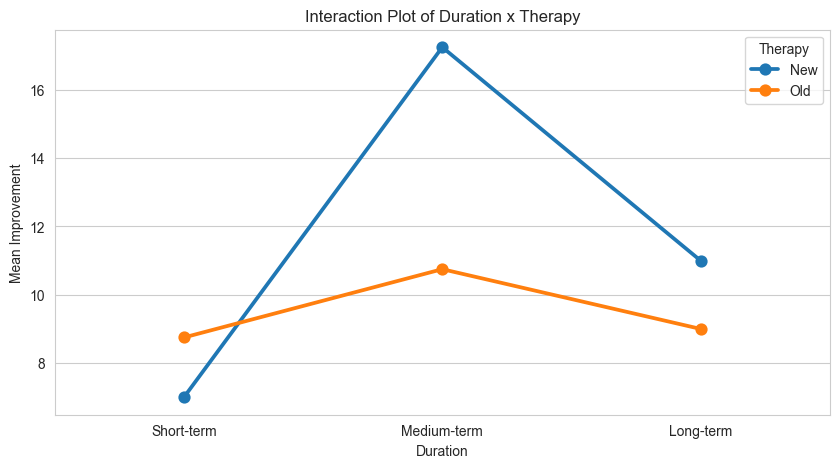

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the aesthetics for the plots
sns.set_style("whitegrid")

# Interaction plot for Duration x Therapy
plt.figure(figsize=(10, 5))
sns.pointplot(x='Duration', y='Improvement', hue='Therapy', data=df, ci=None)
plt.title('Interaction Plot of Duration x Therapy')
plt.ylabel('Mean Improvement')
plt.xlabel('Duration')
plt.legend(title='Therapy')
plt.show()

This plot illustrates the interaction between Duration and Therapy. It shows the mean improvement scores for each duration (Short-term, Medium-term, and Long-term) split by the type of therapy (New vs. Old).

### ii. Therapy x Duration

C:\Users\Chenxi\AppData\Local\Temp\ipykernel_35040\748995552.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Therapy', y='Improvement', hue='Duration', data=df, ci=None)


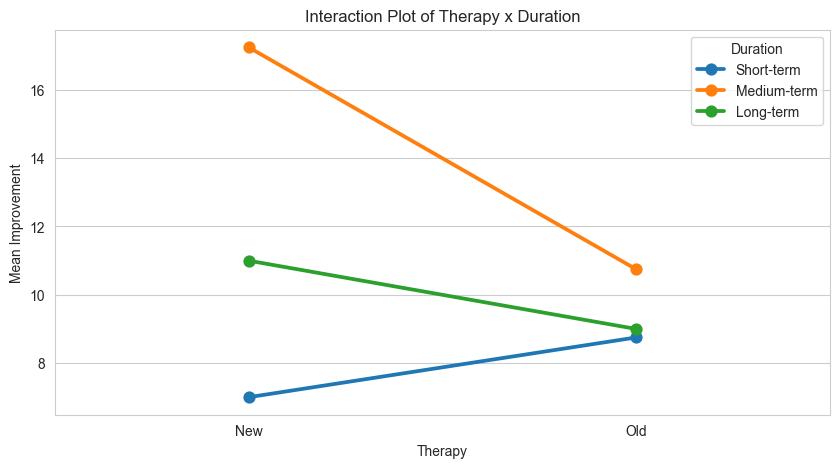

In [8]:
# Interaction plot for Therapy x Duration
plt.figure(figsize=(10, 5))
sns.pointplot(x='Therapy', y='Improvement', hue='Duration', data=df, ci=None)
plt.title('Interaction Plot of Therapy x Duration')
plt.ylabel('Mean Improvement')
plt.xlabel('Therapy')
plt.legend(title='Duration')
plt.show()

This plot shows the interaction between Therapy and Duration, depicting the mean improvement scores for each type of therapy and how they vary across different durations.

## Task 4

Perform the simple effects analyses of the following and comment on the significance of the following simple effects:  
i. Duration at New Therapy (B at A1)  
ii. Therapy at Mid-term (A at B2)  
iii. Therapy at Long-term (A at B3)  

### i. Duration at New Therapy (B at A1)

In [10]:
# Filter the dataframe for 'New' therapy only
new_therapy_df = df[df['Therapy'] == 'New']
# Define the model for new therapy
model_new_therapy = ols('Improvement ~ C(Duration)', data=new_therapy_df).fit()
# Perform ANOVA on the model for new therapy
anova_new_therapy = sm.stats.anova_lm(model_new_therapy, typ=2)

anova_new_therapy

,sum_sq,df,F,PR(>F)
C(Duration),213.50,2.0,27.647482,0.000144
Residual,34.75,9.0,NaN,NaN


**Duration at New Therapy (B at A1)**:  
There is a statistically significant effect of Duration on Improvement when the Therapy is New (F(2, 9) = 27.65, p < 0.001). This suggests that the duration of New therapy significantly affects the improvement index.

### ii. Therapy at Mid-term (A at B2)

In [12]:
# Filter the dataframe for 'Medium-term' duration only
mid_term_df = df[df['Duration'] == 'Medium-term']
# Define the model for mid-term duration
model_mid_term = ols('Improvement ~ C(Therapy)', data=mid_term_df).fit()
# Perform ANOVA on the model for mid-term duration
anova_mid_term = sm.stats.anova_lm(model_mid_term, typ=2)

anova_mid_term

,sum_sq,df,F,PR(>F)
C(Therapy),84.5,1.0,18.436364,0.005128
Residual,27.5,6.0,NaN,NaN


**Therapy at Mid-term (A at B2)**:  
There is a statistically significant effect of Therapy on Improvement during the Mid-term duration (F(1, 6) = 18.44, p = 0.005). This indicates that the type of therapy (New vs. Old) significantly affects the improvement index at the Mid-term duration.

### iii. Therapy at Long-term (A at B3)

In [13]:
# Filter the dataframe for 'Long-term' duration only
long_term_df = df[df['Duration'] == 'Long-term']
# Define the model for long-term duration
model_long_term = ols('Improvement ~ C(Therapy)', data=long_term_df).fit()
# Perform ANOVA on the model for long-term duration
anova_long_term = sm.stats.anova_lm(model_long_term, typ=2)

anova_long_term

,sum_sq,df,F,PR(>F)
C(Therapy),8.0,1.0,2.0,0.207031
Residual,24.0,6.0,NaN,NaN


**Therapy at Long-term (A at B3)**:  
The effect of Therapy on Improvement during the Long-term duration is not statistically significant (F(1, 6) = 2.00, p = 0.207). This suggests that at Long-term duration, the type of therapy does not have a significant impact on the improvement index.

## Task5

Provide the conclusions drawn from the simple effects analyses?

**Duration at New Therapy (B at A1)**:  
The Duration of therapy significantly affects the Improvement index when the therapy is New. This means that the length of the New therapy (Short-term, Medium-term, or Long-term) has a significant impact on how much improvement is observed. The p-value being less than 0.001 indicates a very strong statistical significance, which suggests that the difference in improvement scores across different durations is unlikely to be due to chance.  
**Therapy at Mid-term (A at B2)**:  
At the Mid-term duration, the type of therapy (New vs. Old) significantly influences the Improvement index. This indicates that, at this duration, one therapy leads to a statistically significant different amount of improvement compared to the other. With a p-value of 0.0051, we can be fairly confident that this result is not due to random variation, but rather that the difference in therapies truly has an effect.  
**Therapy at Long-term (A at B3)**:  
For the Long-term duration, the difference in Improvement index between the New and Old therapies is not statistically significant. This means that, over the long term, the type of therapy does not have a statistically detectable impact on the amount of improvement. The p-value of 0.207 exceeds the typical alpha level of 0.05, indicating that we cannot reject the null hypothesis that there is no difference between therapies for long-term improvement.  
- In summary, while the type of therapy and the duration both seem to have significant effects when considered separately or interactively (as shown by the initial ANOVA), the simple effects analysis shows that the impact of these factors can vary when analyzed at specific levels. Specifically, the new therapy seems to be differentially effective depending on the duration, and the type of therapy makes a significant difference in the mid-term but not in the long-term.